# 作業

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [2]:
import cv2
import time
import numpy as np

img = cv2.imread('lena.png')

## By math
point follows pic

In [25]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

M_rotate = np.append(cv2.getRotationMatrix2D((cols//2, rows//2), 45, 0.5),[[0,0,1]],axis=0)
M_translate = np.append(np.array([[1, 0, 100], [0, 1, -50]], dtype=np.float32),[[0,0,1]],axis=0)
M_affine = M_translate@M_rotate

print(M_affine)

[[  0.35355339   0.35355339 174.98066402]
 [ -0.35355339   0.35355339 206.        ]
 [  0.           0.           1.        ]]


In [32]:
#affine transformation over pt1
pt3 = np.ones((3,3))
pt3[:,:2] = pt1
print(pt3.T)
pt3 = pt3@M_affine.T
print(pt3)

[[ 50. 300. 200.]
 [ 50. 100. 300.]
 [  1.   1.   1.]]
[[210.33600308 206.           1.        ]
 [316.40202025 135.28932188   1.        ]
 [351.75735931 241.35533906   1.        ]]


In [33]:
# 取得 affine 矩陣並做 affine 操作
img_affine = cv2.warpAffine(img, M_affine[:2,:], (cols, rows))

# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    
for idx, pts in enumerate(pt3[:,:2]):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

# 組合 + 顯示圖片
img_show_affine = np.hstack((img_copy, img_affine))
while True:
    cv2.imshow('affine transformation', img_show_affine)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

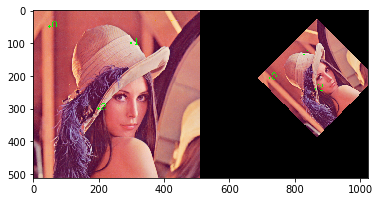

In [35]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img_show_affine, cv2.COLOR_BGR2RGB))
plt.show()

## Affine Transformation - Case 2: any three point

pic follows points

In [4]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

M_affine = cv2.getAffineTransform(pt1,pt2)

# 取得 affine 矩陣並做 affine 操作
img_affine = cv2.warpAffine(img, M_affine[:2,:], (cols, rows))

# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    
for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

# 組合 + 顯示圖片
img_show_affine = np.hstack((img_copy, img_affine))
while True:
    cv2.imshow('affine transformation', img_show_affine)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

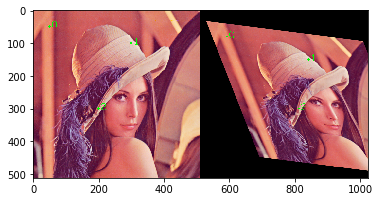

In [6]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img_show_affine, cv2.COLOR_BGR2RGB))
plt.show()